# Dominik Szot, 14.04.2023
# Laboratorium 05 
# Aproksymacja

## Zadanie 1 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate

Inicjalizowanie zmiennych oraz dane testowe.

In [2]:
years = np.array([1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
points = np.array([76212168, 92228496, 106021537, 123202624, 132164569,  151325798, 179323175,  203302031,  226542199])

actual_value = 248709873
difference_array = np.zeros(7)
AIC = np.zeros(7)

new_years = np.arange(1900, 1991, 1)
new_points = []
cooeficient_vector = []

Funkcja tworząca macierz jednomianów.

In [3]:
def create_matrix(pow: int):
    matrix = np.zeros((9, pow+1))
    for i in range(len(years)):
        for j in range(pow+1):
            matrix[i][j] = (years[i] ** j)

    return matrix

Wartość wielomianu będę obliczał korzystając z Algorytmu Hornera.

In [4]:
def horner(L, x):
    i = len(L) - 1
    result = L[i]
    while i > 0:
        i = i - 1
        result = result*x + L[i]

    return result

Następnie wykonuję aproksymację średniokwadratową punktową populacji na przedziale [1900,1980] wielomianami stopnia m dla 0 <= m <= 6 oraz dokonuję ekstapolacji wielomianu do roku 1990. Do rozwiązania równania używam funkcji <i>numpy.linalg.lstsq<i> z biblioteki numpy.

Stopień wielomianu  Wartość błędu względnego
0                                   0.423549
1                                   0.423549
2                                   0.051875
3                                   0.024137
4                                   0.051181
5                                   0.052530
6                                   0.051278

Stopień wielomianu  Wartość kryterium informacyjnego Akaikego
0                                                  340.785996
1                                                  337.976243
2                                                  303.743989
3                                                  293.951746
4                                                  302.170482
5                                                  324.790191
6                                                  395.254546


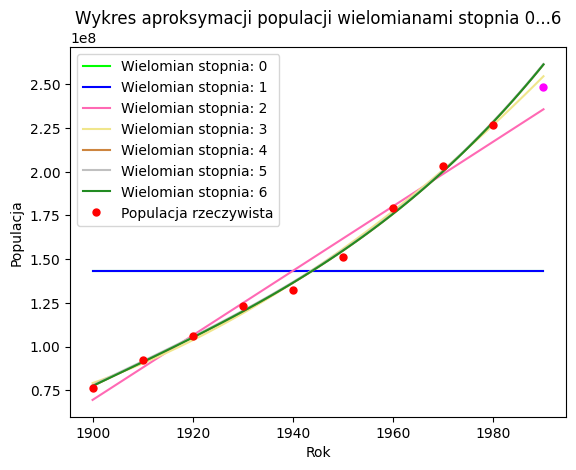

In [5]:
color = ["lime","blue","hotpink","khaki","peru","silver","forestgreen"]

for i in range(0,7):
    p_matrix = create_matrix(i)
    cooeficient_vector.append(np.linalg.lstsq(p_matrix,points,rcond=-1)[0])
    new_points = [horner(cooeficient_vector[i-1], x) for x in new_years]

    difference_array[i] = np.abs(actual_value - new_points[90])/actual_value
    sqr_diff = [(new_points[10*i] - points[i])**2 for i in range(len(years))]

    k = i+1
    n = len(years)
    AIC[i] = 2*k*(k+1)/(n-k-1) + 2*k+n*np.log(sum(sqr_diff)/k)

    plt.plot(new_years,new_points,label="Wielomian stopnia: "+ str(i),color=color[i])

plt.plot(years, points, ".", markersize = 10, color = "red", label="Populacja rzeczywista")
plt.plot(1990, actual_value, ".", markersize = 10, color ="magenta")
plt.legend()

plt.xlabel("Rok")
plt.ylabel("Populacja")
plt.title("Wykres aproksymacji populacji wielomianami stopnia 0...6")

df2 = pd.DataFrame(data=difference_array, index=[0,1,2,3,4,5,6], columns=["Wartość błędu względnego"])
df2 = df2.rename_axis('Stopień wielomianu', axis=1)
print(df2)
print()

df3 = pd.DataFrame(data=AIC, index=[0,1,2,3,4,5,6], columns=["Wartość kryterium informacyjnego Akaikego"])
df3 = df3.rename_axis('Stopień wielomianu', axis=1)
print(df3)

Najmniejszy błąd bezwzględny posiada wielomian stopnia 3.<br />
Najlepsza wartość kryterium Akaikego występuje dla wielomianu stopnia 3.<br />

Warto zauważyć że wyższy stopień wielomianu nie zawsze wpływa pozytywnie na dokładność wyników.<br /> 
Dla wielomianu stopnia 6 wartość zrówno kryterium Akaikego jak i błędu względnego <br /> jest dużo większa niż dla wielomianu stopnia 3.<br />

# Zadanie 2

In [6]:
f_x = lambda x : x**(1/2)

Funkcja wagi dla wielomianu Czebyszewa (pierwszego typu) dla przedziału [-1, 1]

In [7]:
w_x = lambda x: (1-(x**2))**(-1/2)

Aby otrzymać przedział [-1, 1] z przedziału [0, 2] musimy przeprowadzić transformację przedziału.

In [8]:
a = 0
b = 2

t_x = lambda x: (x-(a+b)/2)*(2)/(b-a) 

Wielomiany Czebyszewa można zdefiniować za pomocą funkcji rekurencyjnej: <br />
T<sub>n</sub>(x) = 2xT<sub>n-1</sub>(x) - T<sub>n-2</sub>(x)

Dla wielomianu stopnia 2 funkcje bazowe będą postaci: <br />
T<sub>0</sub>(x) = 1 <br />
T<sub>1</sub>(x) = x<br />
T<sub>2</sub>(x) = 2x<sub>2</sub>-1

In [9]:
T_0 = lambda x : 1 
T_1 = lambda x : t_x(x)
T_2 = lambda x : 2*t_x(x)**2 - 1

Następnie jesteśmy w stanie obliczyć współczynniki wielomianu.

In [10]:
C_0 = integrate.quad(lambda x: w_x(t_x(x))*f_x(x)*T_0(x), 0, 2)[0] * np.pi ** (-1)
C_1 = integrate.quad(lambda x: w_x(t_x(x))*f_x(x)*T_1(x), 0, 2)[0] * np.pi ** (-1) * 2
C_2 = integrate.quad(lambda x: w_x(t_x(x))*f_x(x)*T_2(x), 0, 2)[0] * np.pi ** (-1) * 2

Ponieważ mamy wyznaczone funkcje bazowe oraz współczynniki wielomianu <br/> jesteśmy wyznaczyć funkcję która posłuży do aproksymacji wartości funkcji f(x):

In [11]:
approximated_value = lambda x : C_0*T_0(x) + C_1*T_1(x) + C_2*T_2(x)

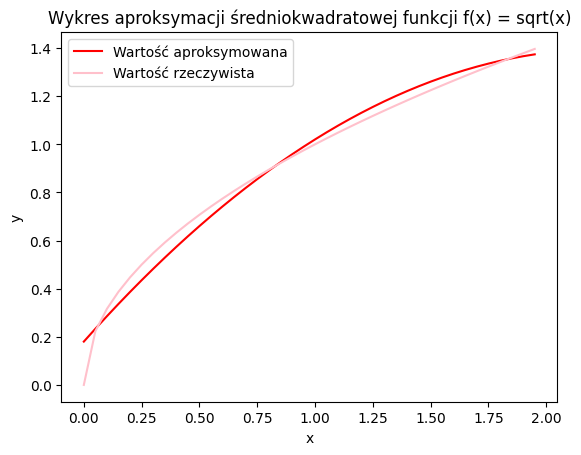

In [12]:
x_axis = np.arange(0, 2, 0.05)
y_axis = [approximated_value(i) for i in x_axis]
actual_value = [f_x(x) for x in x_axis]

plt.plot(x_axis, y_axis, label="Wartość aproksymowana", color="red")
plt.plot(x_axis, actual_value, label="Wartość rzeczywista", color="pink")
plt.title("Wykres aproksymacji średniokwadratowej funkcji f(x) = sqrt(x)")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()

Funkcja aproksymowana nie przybliżyła wartości funkcji tak dokładnie jak niektóre <br/>metody interpolacji, jednak jest znacznie prostsza i tańsza obliczeniowo.

# Bibliografia
* Katarzyna Rycerz: Wykład z przedmiotu Metody Obliczeniowe w Nauce i Technice
* Materiały do zajęć 
* https://en.wikipedia.org/wiki/Chebyshev_polynomials